In [1]:
import numpy as np
import pandas as pd


In [2]:
##Importação dos dados de treino

In [3]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_3280\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_3280\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_3280\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [4]:
##Remoção de valores nulos

In [5]:
fd001_train = fd001_train.dropna()
fd001_test = fd001_test.dropna()

In [6]:
##Introdução do cabeçalho do data frame

In [7]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [8]:
##Geração de Histogramas e seleção de variáveis

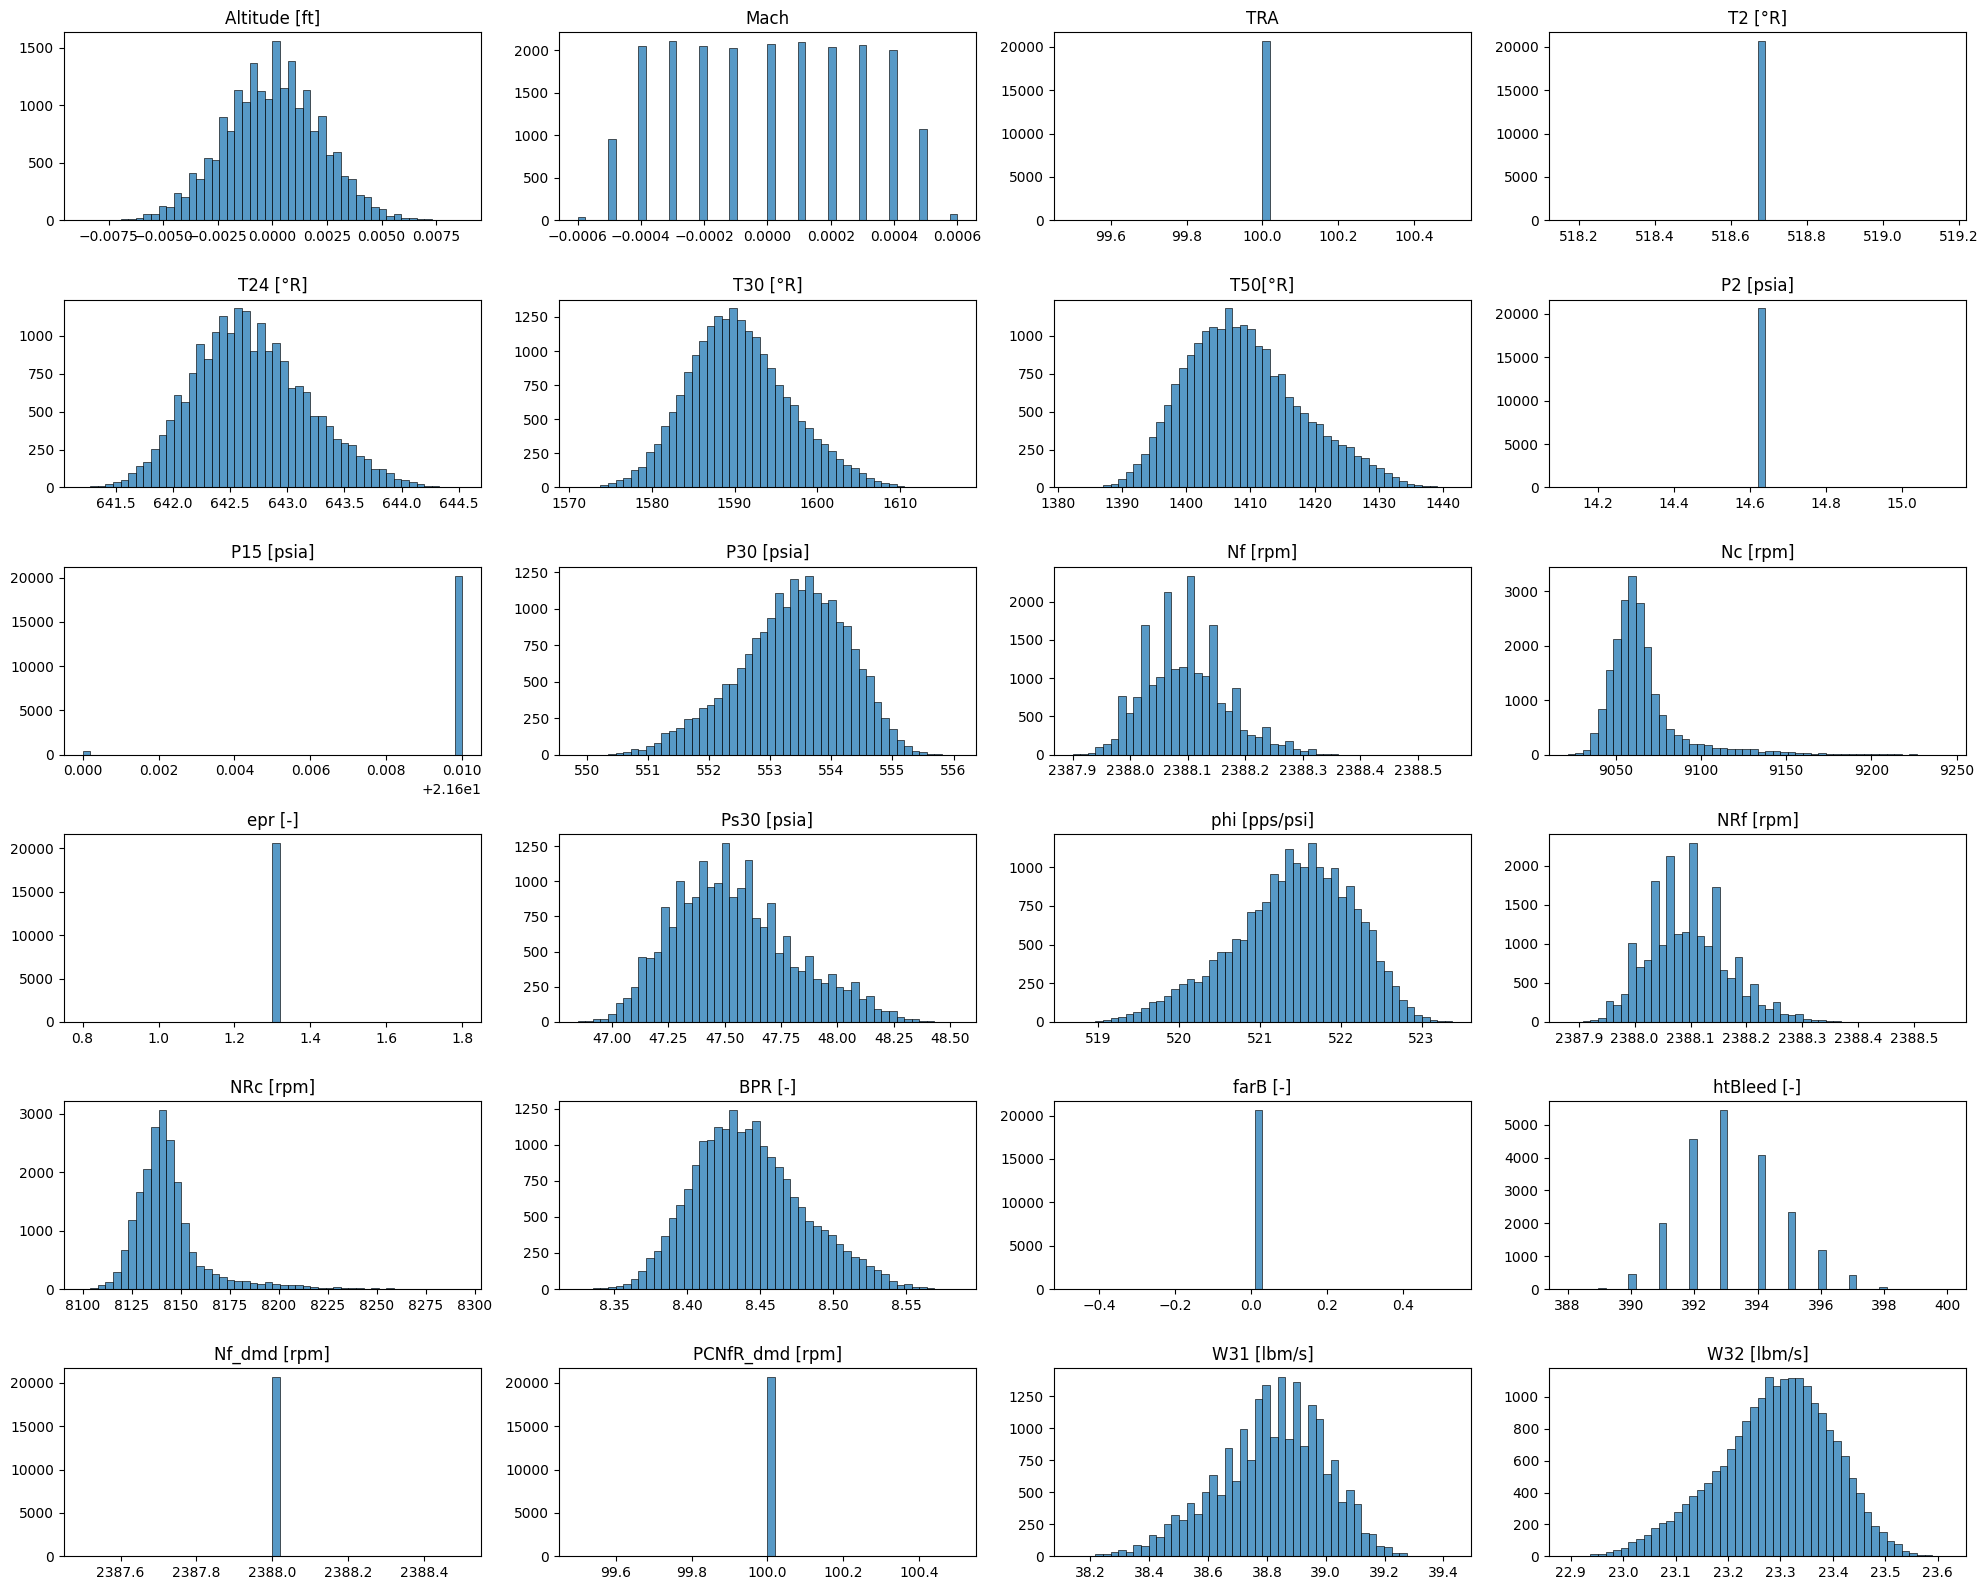

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [10]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]' ,'epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [11]:
##Normalização 

In [12]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [13]:
##Definição dos targets para regressão nos dados de treino

In [14]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [15]:
##Visualização de um ciclo de vida de um motor 

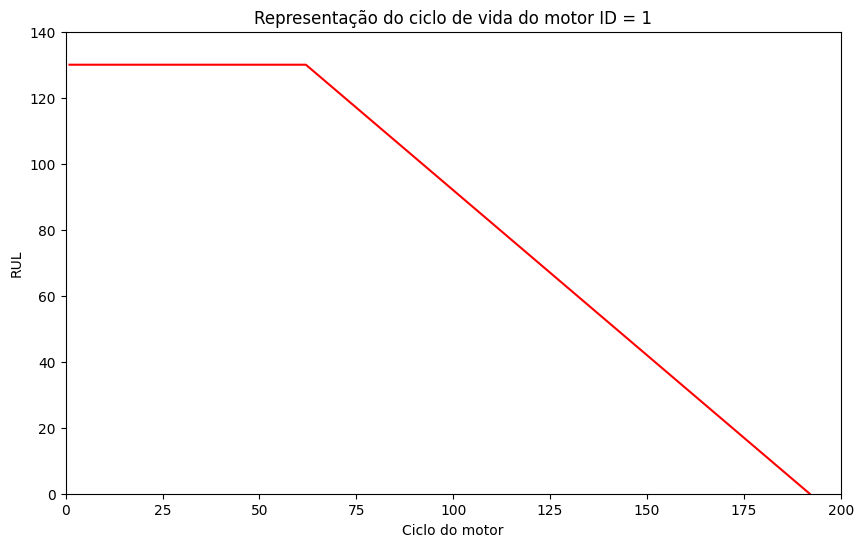

In [16]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [17]:
##Definição dos targets para regressão nos dados de teste 

In [18]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [19]:
##Criação das janelas de tempo para dados de treino e de teste

In [20]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [21]:
##Separação das variáveis de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [23]:
##Criação do modelo LSTM

In [24]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm=hp.Int('layers_lstm',1,3)
    n_layers_dense=hp.Int('layers_dense',1,3)
    model.add(LSTM(hp.Choice('lstm_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_lstm):
        return_seq = i <n_layers_lstm -1
        model.add(LSTM(hp.Choice(f'lstm_{i+1}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models(num_models=1)[0]
best_trial=tuner_lstm.oracle.get_best_trials(num_trials=1)[0]
param_lstm=best_trial.hyperparameters.get_config()['values']
n_lstm = int(param_lstm.get('layers_lstm',1))+1
n_dense=int(param_lstm.get('layers_dense',1))+1
best_param_lstm = {}

for k in range(n_lstm):
    key1=f'lstm_{k}'
    key2 = f'dropout_{k}'
    best_param_lstm[key1] = param_lstm[key1]
    best_param_lstm[key2] = param_lstm[key2] 

for k in range(n_dense):
    key3=f'dense_{k}'
    if k < n_dense-1:
        best_param_lstm[key3] = param_lstm[key3]
    else:
        best_param_lstm[key3] = 1

best_param_lstm['learning_rate'] = param_lstm['learning_rate']
print(f'n_lstm = {n_lstm}, n_dense = {n_dense}')
for k,v in best_param_lstm.items():
    print(f'{k:15s} -> {v}')

Trial 10 Complete [00h 02m 02s]
val_loss: 219.05921936035156

Best val_loss So Far: 193.84390258789062
Total elapsed time: 01h 07m 19s
n_lstm = 2, n_dense = 4
lstm_0          -> 64
dropout_0       -> 0.4000000000000001
lstm_1          -> 256
dropout_1       -> 0.4000000000000001
dense_0         -> 64
dense_1         -> 64
dense_2         -> 32
dense_3         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 304.3065 - mean_absolute_error: 12.9177 - mean_squared_error: 304.3065

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - loss: 268.8287 - mean_absolute_error: 12.2081 - mean_squared_error: 268.8287 - val_loss: 185.6662 - val_mean_absolute_error: 10.0232 - val_mean_squared_error: 185.6662
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 242.5740 - mean_absolute_error: 11.5673 - mean_squared_error: 242.5740

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - loss: 249.0511 - mean_absolute_error: 11.7788 - mean_squared_error: 249.0511 - val_loss: 199.8728 - val_mean_absolute_error: 10.0173 - val_mean_squared_error: 199.8728
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 249.2478 - mean_absolute_error: 11.7555 - mean_squared_error: 249.2478

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - loss: 246.0317 - mean_absolute_error: 11.6918 - mean_squared_error: 246.0317 - val_loss: 215.1014 - val_mean_absolute_error: 10.3384 - val_mean_squared_error: 215.1014
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 251.4446 - mean_absolute_error: 11.7985 - mean_squared_error: 251.4446

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - loss: 242.6302 - mean_absolute_error: 11.5971 - mean_squared_error: 242.6302 - val_loss: 214.1016 - val_mean_absolute_error: 10.0376 - val_mean_squared_error: 214.1016
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 249.2244 - mean_absolute_error: 11.7136 - mean_squared_error: 249.2244

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - loss: 243.6146 - mean_absolute_error: 11.6021 - mean_squared_error: 243.6146 - val_loss: 237.1511 - val_mean_absolute_error: 10.5497 - val_mean_squared_error: 237.1511
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 253.4691 - mean_absolute_error: 11.6616 - mean_squared_error: 253.4691

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 248ms/step - loss: 245.1001 - mean_absolute_error: 11.5877 - mean_squared_error: 245.1001 - val_loss: 183.1549 - val_mean_absolute_error: 10.1955 - val_mean_squared_error: 183.1549
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 228.8297 - mean_absolute_error: 11.2987 - mean_squared_error: 228.8297

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 246ms/step - loss: 234.3656 - mean_absolute_error: 11.4267 - mean_squared_error: 234.3656 - val_loss: 180.7504 - val_mean_absolute_error: 10.0038 - val_mean_squared_error: 180.7504
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 234.4702 - mean_absolute_error: 11.3006 - mean_squared_error: 234.4702

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - loss: 238.8584 - mean_absolute_error: 11.4183 - mean_squared_error: 238.8584 - val_loss: 179.8835 - val_mean_absolute_error: 9.8318 - val_mean_squared_error: 179.8835
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 233.8175 - mean_absolute_error: 11.3968 - mean_squared_error: 233.8175

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - loss: 229.0374 - mean_absolute_error: 11.2472 - mean_squared_error: 229.0374 - val_loss: 197.7304 - val_mean_absolute_error: 9.9703 - val_mean_squared_error: 197.7304
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 224.7010 - mean_absolute_error: 11.0824 - mean_squared_error: 224.7010

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - loss: 231.4723 - mean_absolute_error: 11.2873 - mean_squared_error: 231.4723 - val_loss: 260.9808 - val_mean_absolute_error: 12.3509 - val_mean_squared_error: 260.9808
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 234.1597 - mean_absolute_error: 11.3584 - mean_squared_error: 234.1597

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 232.7108 - mean_absolute_error: 11.3160 - mean_squared_error: 232.7108 - val_loss: 205.5780 - val_mean_absolute_error: 9.9334 - val_mean_squared_error: 205.5780
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 229.6516 - mean_absolute_error: 11.1979 - mean_squared_error: 229.6516

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - loss: 228.6879 - mean_absolute_error: 11.1942 - mean_squared_error: 228.6879 - val_loss: 190.7682 - val_mean_absolute_error: 10.2196 - val_mean_squared_error: 190.7682
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 230.4933 - mean_absolute_error: 11.2730 - mean_squared_error: 230.4933

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - loss: 230.5898 - mean_absolute_error: 11.2421 - mean_squared_error: 230.5898 - val_loss: 199.3560 - val_mean_absolute_error: 9.8035 - val_mean_squared_error: 199.3560


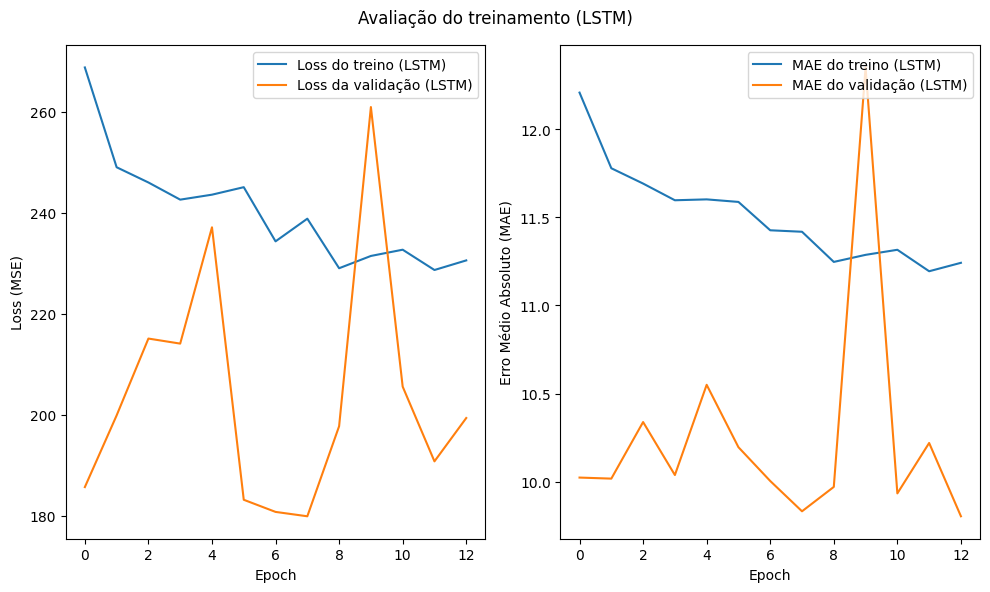

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [27]:
##Testando o modelo com os dados de teste 

In [28]:
rul_prev = best_model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [29]:
##Avaliando o modelo

225.74431554432022
15.02
0.12427426052651985
10.525920297268
0.7720527308110253
Tempo de 4270.558730125427s


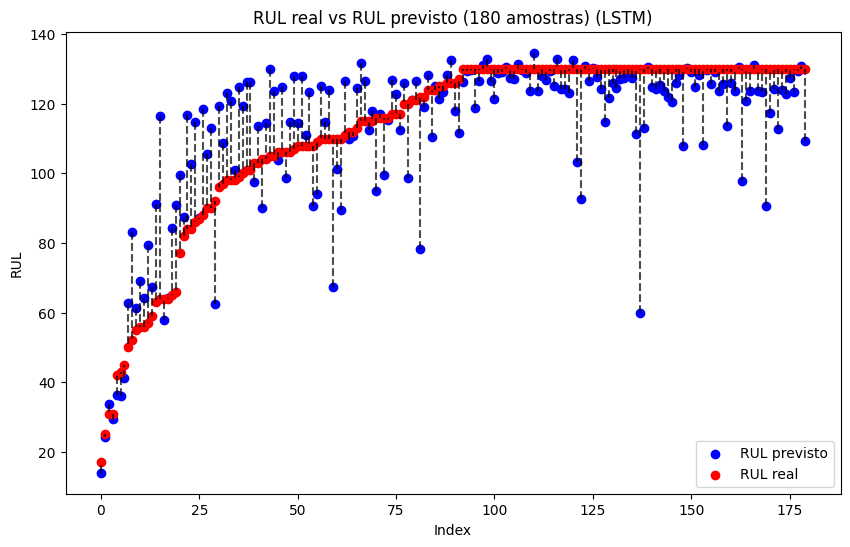

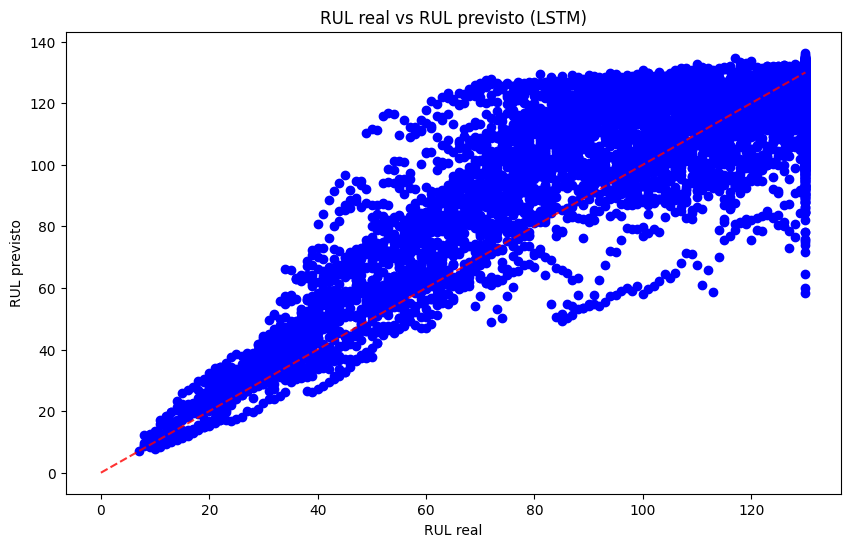

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [31]:
##Criando modelo BiLSTM

In [32]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi=hp.Int('layers_bi',1,3)
    n_layers_dense=hp.Int('layers_dense',1,3)
    model.add(Bidirectional(LSTM(hp.Choice('bi_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_bi):
        return_seq = i <n_layers_bi -1
        model.add(Bidirectional(LSTM(hp.Choice(f'bi_{i+1}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_bi',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models(num_models=1)[0]
best_trial=tuner_bilstm.oracle.get_best_trials(num_trials=1)[0]
param_bi = best_trial.hyperparameters.get_config()['values']
n_bi = int(param_bi.get('layers_bi',1))
n_dense = int(param_bi.get('layers_dense',1)) 
best_param_bi={}

for k in range(n_bi):
    key1 = f'bi_{k}'
    key2 = f'dropout_{k}'
    best_param_bi[key1] = param_bi[key1]
    best_param_bi[key2] = param_bi[key2]

for k in range(n_dense):
    key3 =f'dense_{k}'
    if k < n_dense -1:
        best_param_bi[key3] = param_bi[key3]
    else:
        best_param_bi[key3] = 1

best_param_bi['learning_rate'] = param_bi['learning_rate'] 
print(f'n_bi = {n_bi}, n_dense = {n_dense}')
for k,v in best_param_bi.items():
    print(f'{k:15s} -> {v}')

Trial 10 Complete [00h 07m 23s]
val_loss: 211.8404083251953

Best val_loss So Far: 198.6419677734375
Total elapsed time: 00h 49m 30s
n_bi = 1, n_dense = 2
bi_0            -> 64
dropout_0       -> 0.5000000000000001
dense_0         -> 64
dense_1         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [33]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 279.6248 - mean_absolute_error: 12.4217 - mean_squared_error: 279.6248

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - loss: 256.1916 - mean_absolute_error: 11.9427 - mean_squared_error: 256.1916 - val_loss: 205.9758 - val_mean_absolute_error: 9.8875 - val_mean_squared_error: 205.9758
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 234.8439 - mean_absolute_error: 11.4213 - mean_squared_error: 234.8439

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 235.6878 - mean_absolute_error: 11.4278 - mean_squared_error: 235.6878 - val_loss: 230.9702 - val_mean_absolute_error: 11.6626 - val_mean_squared_error: 230.9702
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 246.4814 - mean_absolute_error: 11.7058 - mean_squared_error: 246.4814

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 247.0367 - mean_absolute_error: 11.7224 - mean_squared_error: 247.0367 - val_loss: 190.1457 - val_mean_absolute_error: 9.7542 - val_mean_squared_error: 190.1457
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 228.9449 - mean_absolute_error: 11.1326 - mean_squared_error: 228.9449

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 238.5343 - mean_absolute_error: 11.3975 - mean_squared_error: 238.5343 - val_loss: 242.2318 - val_mean_absolute_error: 10.3626 - val_mean_squared_error: 242.2318
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 235.6273 - mean_absolute_error: 11.3228 - mean_squared_error: 235.6273

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 236.4784 - mean_absolute_error: 11.3558 - mean_squared_error: 236.4784 - val_loss: 193.6271 - val_mean_absolute_error: 9.6241 - val_mean_squared_error: 193.6271
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 247.6733 - mean_absolute_error: 11.7108 - mean_squared_error: 247.6733

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 251.1470 - mean_absolute_error: 11.8009 - mean_squared_error: 251.1470 - val_loss: 207.7487 - val_mean_absolute_error: 10.4669 - val_mean_squared_error: 207.7487
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 246.7894 - mean_absolute_error: 11.6849 - mean_squared_error: 246.7893

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 240.4100 - mean_absolute_error: 11.5126 - mean_squared_error: 240.4100 - val_loss: 180.3987 - val_mean_absolute_error: 9.7797 - val_mean_squared_error: 180.3987
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 251.0939 - mean_absolute_error: 11.7307 - mean_squared_error: 251.0939

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 241.2064 - mean_absolute_error: 11.4892 - mean_squared_error: 241.2064 - val_loss: 214.7144 - val_mean_absolute_error: 9.9839 - val_mean_squared_error: 214.7144
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 239.6441 - mean_absolute_error: 11.5497 - mean_squared_error: 239.6442

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 233.6484 - mean_absolute_error: 11.3708 - mean_squared_error: 233.6484 - val_loss: 254.1031 - val_mean_absolute_error: 12.2170 - val_mean_squared_error: 254.1031
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 229.3183 - mean_absolute_error: 11.2589 - mean_squared_error: 229.3183

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 234.4548 - mean_absolute_error: 11.3137 - mean_squared_error: 234.4548 - val_loss: 187.8000 - val_mean_absolute_error: 9.9023 - val_mean_squared_error: 187.8000
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 219.5043 - mean_absolute_error: 11.0027 - mean_squared_error: 219.5043

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 225.6201 - mean_absolute_error: 11.1676 - mean_squared_error: 225.6201 - val_loss: 186.2117 - val_mean_absolute_error: 10.2785 - val_mean_squared_error: 186.2117
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 225.6356 - mean_absolute_error: 11.1241 - mean_squared_error: 225.6356

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 226.2693 - mean_absolute_error: 11.1264 - mean_squared_error: 226.2693 - val_loss: 182.8251 - val_mean_absolute_error: 9.4813 - val_mean_squared_error: 182.8251


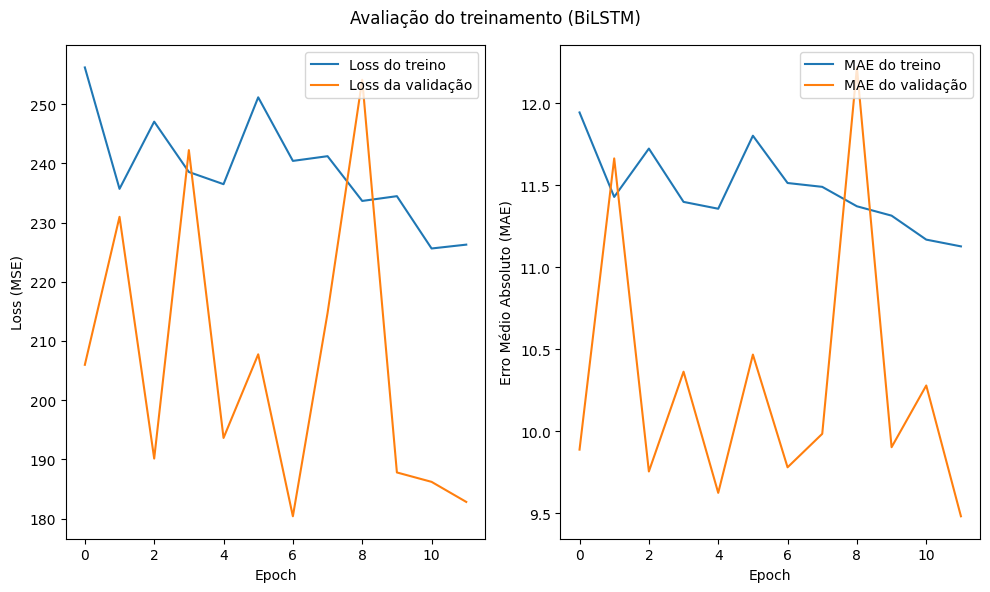

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [35]:
##Testando o modelo com os dados de teste

In [36]:
rul_prev = best_model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [37]:
##Avaliando o modelo

210.26305200487892
14.50
0.11643270318485247
9.964964435819834
0.7876850701631879
Tempo de 3102.595231771469s


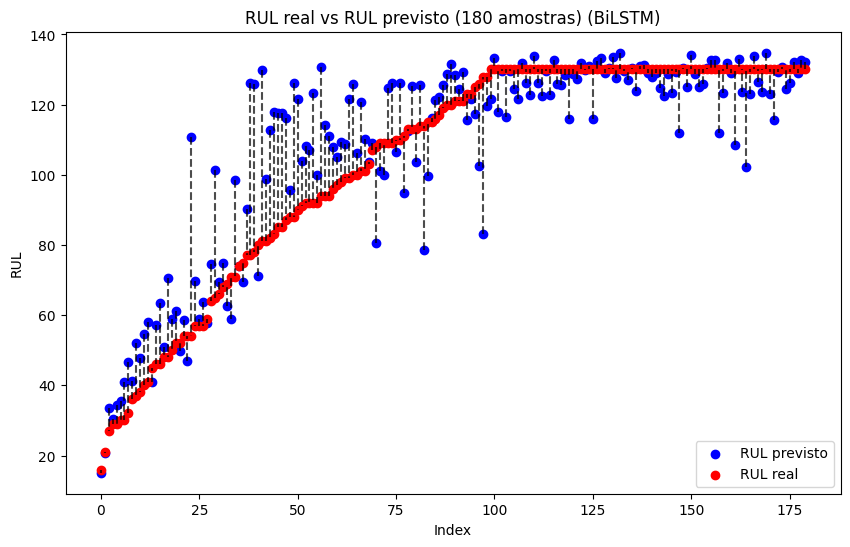

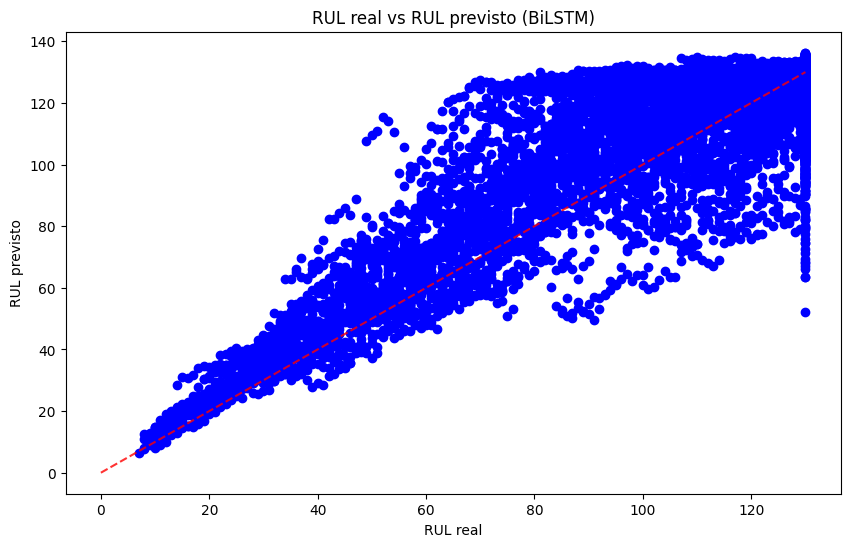

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()